### Import Required libraries

In [1]:
import psycopg2
import pandas as pd
import psycopg2.extras
import pandas.io.sql as sqlio

import warnings
warnings.filterwarnings('ignore')

In [2]:
import matplotlib.pyplot as plt

## DataBase Connection

In [3]:
class PostgresConnection(object):
    def __init__(self):
        self.connection = psycopg2.connect(database="ecomdb",
                                           user = "postgres",
                                           password = "afra1234",
                                           host = "127.0.0.1",
                                           port = "5432")

    def getConnection(self):
        print("successfully connected to database")
        return self.connection

In [4]:
con = PostgresConnection().getConnection()

successfully connected to database


In [5]:
conn = psycopg2.connect(database="ecomdb",
                                           user = "postgres",
                                           password = "afra1234",
                                           host = "127.0.0.1",
                                           port = "5432")
print("successfully connected to database")

successfully connected to database


## Simple CUBE query

### Q1: Find the division/district/year/month wise total_sale_price joining fact table and respective dimension table

***Total_sale_price By Division Wise***

In [6]:
cur = con.cursor()
select_stmt = "SELECT  s.division, t.item_key, SUM(t.total_price) FROM ecom_schema.fact_table t JOIN ecom_schema.store_dim s on s.store_key = t.store_key GROUP BY CUBE(s.division, t.item_key) ORDER BY s.division ASC"
cur.execute(select_stmt)
records = cur.fetchall()
df = pd.DataFrame(list(records), columns=['division', 'item_key', 'total_sales_price'])
df.head(10)

,division,item_key,total_sales_price
0,BARISAL,I00095,24880.0
1,BARISAL,I00173,30096.0
2,BARISAL,I00006,25480.00
3,BARISAL,I00223,22396.5
4,BARISAL,I00043,41472.0
5,BARISAL,I00088,28611.0
6,BARISAL,I00250,29425.5
7,BARISAL,I00110,37462.5
8,BARISAL,I00199,26670.0
9,BARISAL,I00139,35328.0


In [7]:
con = PostgresConnection().getConnection()

cur = con.cursor()
select_stmt = "SELECT  s.division, SUM(t.total_price) " \
        "FROM ecom_schema.fact_table t " \
        "JOIN ecom_schema.store_dim s on s.store_key = t.store_key " \
        "GROUP BY CUBE(s.division)" \
        "ORDER BY s.division ASC"
cur.execute(select_stmt)
records = cur.fetchall()
records


successfully connected to database


[('BARISAL', Decimal('7520343.75')),
 ('CHITTAGONG', Decimal('19763595.00')),
 ('DHAKA', Decimal('40764619.75')),
 ('KHULNA', Decimal('11311610.50')),
 ('RAJSHAHI', Decimal('12099196.00')),
 ('RANGPUR', Decimal('8429836.50')),
 ('SYLHET', Decimal('5512234.25')),
 (None, Decimal('105401435.75'))]

In [8]:
df = pd.DataFrame(list(records), columns=['Division', 'Total_sales'])
df.head(10)

,Division,Total_sales
0,BARISAL,7520343.75
1,CHITTAGONG,19763595.00
2,DHAKA,40764619.75
3,KHULNA,11311610.50
4,RAJSHAHI,12099196.00
5,RANGPUR,8429836.50
6,SYLHET,5512234.25
7,None,105401435.75


In [9]:
df.dtypes

Division       object
Total_sales    object
dtype: object

In [10]:
df['Total_sales'] = df['Total_sales'].astype('float64')

In [11]:
df.dtypes

Division        object
Total_sales    float64
dtype: object

In [13]:
df = df.set_index(['Division'])

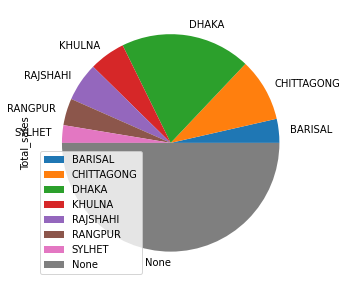

In [14]:
plot = df.plot.pie(y='Total_sales', figsize=(5, 5))

***Total_sale_price By District Wise***

In [17]:
con = PostgresConnection().getConnection()

cur = con.cursor()
select_stmt = "SELECT  s.district, t.item_key, SUM(t.total_price) " \
        "FROM ecom_schema.fact_table t " \
        "JOIN ecom_schema.store_dim s on s.store_key = t.store_key " \
        "GROUP BY CUBE(s.district, t.item_key)" \
        "ORDER BY s.district ASC"  # Ascending order
cur.execute(select_stmt)
records = cur.fetchall()
df = pd.DataFrame(list(records), columns=['District', 'item_key', 'total_sales_price'])
df.head(10)

successfully connected to database


,District,item_key,total_sales_price
0,BAGERHAT,I00001,2863.5
1,BAGERHAT,I00002,1559.25
2,BAGERHAT,I00003,2362.50
3,BAGERHAT,I00004,2038.50
4,BAGERHAT,I00005,2058.75
5,BAGERHAT,I00006,4371.25
6,BAGERHAT,I00007,1707.75
7,BAGERHAT,I00008,5248.75
8,BAGERHAT,I00009,4598.75
9,BAGERHAT,I00010,2396.25


***Total_sale_price By year Wise***

In [23]:
con = PostgresConnection().getConnection()

cur = con.cursor()
select_stmt = "SELECT  year, SUM(total_price) total_sales_price " \
        "FROM ecom_schema.time_dim " \
        "INNER JOIN ecom_schema.fact_table ON fact_table.time_key = time_dim.time_key " \
        "GROUP BY CUBE(time_dim.year)"
cur.execute(select_stmt)
records = cur.fetchall()
df = pd.DataFrame(list(records), columns=['month', 'total_sales_price'])
df.head(10)


successfully connected to database


,month,total_sales_price
0,None,105401435.75
1,2021,883772.25
2,2019,14949510.25
3,2018,15108197.25
4,2016,14976508.25
5,2014,14334731.25
6,2015,15095720.25
7,2017,15015806.00
8,2020,15037190.25


### Total_sale_price By month Wise

In [22]:
con = PostgresConnection().getConnection()

cur = con.cursor()
select_stmt = "SELECT  tim.month, SUM(t.total_price) total_sales_price " \
        "FROM ecom_schema.fact_table t " \
        "JOIN ecom_schema.store_dim s on s.store_key = t.store_key " \
        "JOIN ecom_schema.time_dim tim on tim.time_key = t.time_key " \
        "GROUP BY CUBE(tim.month)" \
        "ORDER BY tim.month;"  # Ascending order
cur.execute(select_stmt)
records = cur.fetchall()
df = pd.DataFrame(list(records), columns=['month', 'total_sales_price'])
df.head(10)

successfully connected to database


,month,total_sales_price
0,1,9042244.00
1,2,8073877.50
2,3,8939152.00
3,4,8504634.75
4,5,9078002.50
5,6,8556853.00
6,7,9046580.00
7,8,8929475.25
8,9,8724326.50
9,10,8902783.75


### Q2: Find the customer/bank/transaction(cash/online) wise total_sale_price joining fact table and respective dimension table 

### Q3: Total sales in Barisal

In [25]:
con = PostgresConnection().getConnection()
cur = con.cursor()
select_stmt = "SELECT s.district, SUM(t.total_price) Total_Sales " \
        "FROM ecom_schema.fact_table t " \
        "JOIN ecom_schema.store_dim s on s.store_key = t.store_key " \
        "WHERE s.district = 'BARISAL' " \
        "GROUP BY CUBE (s.district)"
cur.execute(select_stmt)
records = cur.fetchall()
df = pd.DataFrame(list(records), columns=['month', 'total_sales_price'])
df.head(10)

successfully connected to database


,month,total_sales_price
0,BARISAL,2897237.75
1,None,2897237.75


### Q4: Total sales in 2015

In [42]:
con = PostgresConnection().getConnection()
cur = con.cursor()
select_stmt = "SELECT tim.year, SUM(t.total_price) Total_Sales " \
        "FROM ecom_schema.fact_table t " \
        "JOIN ecom_schema.time_dim tim ON t.time_key = tim.time_key " \
        "WHERE tim.year = 2015 " \
        "GROUP BY CUBE (tim.year)"
cur.execute(select_stmt)
records = cur.fetchall()
df = pd.DataFrame(list(records), columns=['month', 'total_sales_price'])
df.head(10)

successfully connected to database


,month,total_sales_price
0,2015,15095720.25
1,None,15095720.25


### Q5: Total sales of Barisal in 2015 using ROLLUP

In [40]:
con = PostgresConnection().getConnection()
cur = con.cursor()
select_stmt = "SELECT tim.year, s.district, SUM(t.total_price) Total_Sales " \
        "FROM ecom_schema.fact_table t " \
        "JOIN ecom_schema.store_dim s on s.store_key = t.store_key " \
        "JOIN ecom_schema.time_dim tim ON t.time_key = tim.time_key " \
        "WHERE s.district = 'BARISAL' and tim.year = 2015 " \
        "GROUP BY ROLLUP (s.district, tim.year)"
cur.execute(select_stmt)
records = cur.fetchall()
df = pd.DataFrame(list(records), columns=['year','district', 'total_sales_price'])
df

successfully connected to database


,year,district,total_sales_price
0,2015,BARISAL,415748.75
1,None,BARISAL,415748.75
2,None,None,415748.75
